# *Forecasting Airline Passenger Satisfaction using Machine Learning*

![](https://honeywell.scene7.com/is/image/honeywell/AeroBT-Plane-02242020-2880x1440)

Open in Google Colab and click the "Run" button to execute the code.

##PROBLEM STATEMENT



> The problem statement is to identify the key factors which lead to the  satisfaction of the customer. The main factors could be factors like:
 >* Delays in the flight
 >* Staff efficiency to address customer needs
 >* Services provided in the flight

In this notebook, our focus will be on exploring various methods of Supervised Machine Learning. Specifically, we will employ classification models, such as logistic regression and decision trees, to train and predict passenger satisfaction using the Scikit Learn library. To gain valuable insights for our machine learning tasks, we will utilize several essential libraries, including Pandas, Numpy, Matplotlib, Seaborn, and Plotly, to conduct exploratory data analysis. Our step-by-step approach will encompass the following:

1. Installation and importation of necessary libraries.
2. Exploration of the dataset and merging of different files, if needed.
3. Translation of the business problem into a machine learning problem.
4. Conducting exploratory data analysis (EDA).
5. Performing feature engineering.
6. Preparing the data, which includes tasks such as train-validation splitting, encoding, imputing, and scaling.
7. Selection of relevant input features.
8. Definition of evaluation metrics.
9. Establishment of a baseline model.
10. Selection of the best model without hyperparameter tuning.
11. Hyperparameter tuning for selected models.
12. Generating predictions.
13. Summarizing insights and key learnings.

By following this comprehensive approach, we aim to extract meaningful information and draw valuable conclusions from our dataset.

## Install and import the required libraries

In [1]:
!pip install --upgrade seaborn
!pip install --upgrade numpy

In [2]:
import seaborn as sns

In [3]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install opendatasets

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [4]:
import opendatasets as od

## Downloading the dataset

In [5]:
import opendatasets as od

# Specify the URL of the Kaggle dataset
dataset_url = "https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction?datasetId=522275&sortBy=commentCount&select=train.csv"

# Provide a name for the downloaded dataset
dataset_name = "airline-passenger-satisfaction"

# Download the dataset
od.download(dataset_url, dataset_name)

Skipping, found downloaded files in "airline-passenger-satisfaction/airline-passenger-satisfaction" (use force=True to force download)


## Exploratory data Analysis

In [6]:
os.listdir('airline-passenger-satisfaction')

['airline-passenger-satisfaction']

In [7]:
#Reading the data file
csv_file_path = '/content/airline-passenger-satisfaction/airline-passenger-satisfaction/train.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

# Display the first few rows of the DataFrame
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


Let us also import the `test.csv` file now.

In [8]:
test_df = pd.read_csv("/content/airline-passenger-satisfaction/airline-passenger-satisfaction/test.csv")

## Data Exploration

In [9]:
df.shape

(103904, 25)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [11]:
print("STATISTICAL ANALYSIS OF NUMERICAL DATA")
df.describe().T

STATISTICAL ANALYSIS OF NUMERICAL DATA


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,103904.0,51951.500000,29994.645522,0.0,25975.75,51951.5,77927.25,103903.0
id,103904.0,64924.210502,37463.812252,1.0,32533.75,64856.5,97368.25,129880.0
Age,103904.0,39.379706,15.114964,7.0,27.00,40.0,51.00,85.0
Flight Distance,103904.0,1189.448375,997.147281,31.0,414.00,843.0,1743.00,4983.0
Inflight wifi service,103904.0,2.729683,1.327829,0.0,2.00,3.0,4.00,5.0
Departure/Arrival time convenient,103904.0,3.060296,1.525075,0.0,2.00,3.0,4.00,5.0
Ease of Online booking,103904.0,2.756901,1.398929,0.0,2.00,3.0,4.00,5.0
Gate location,103904.0,2.976883,1.277621,0.0,2.00,3.0,4.00,5.0
Food and drink,103904.0,3.202129,1.329533,0.0,2.00,3.0,4.00,5.0
Online boarding,103904.0,3.250375,1.349509,0.0,2.00,3.0,4.00,5.0


* The average delay in flights are 15 minutes, with a deviation of 38
* Median of the delays are 0, which means 50% of the flights from this data, were not delayed

In [12]:
print("STATISTICAL ANALYSIS OF CATEGORICAL DATA")
print(df.describe(exclude = ['float', 'int64']).T)

STATISTICAL ANALYSIS OF CATEGORICAL DATA
                 count unique                      top   freq
Gender          103904      2                   Female  52727
Customer Type   103904      2           Loyal Customer  84923
Type of Travel  103904      2          Business travel  71655
Class           103904      3                 Business  49665
satisfaction    103904      2  neutral or dissatisfied  58879


In [13]:
print("MISSING VALUES")
df.isna().sum().sort_values(ascending=False)

MISSING VALUES


Arrival Delay in Minutes             310
Unnamed: 0                             0
Online boarding                        0
Departure Delay in Minutes             0
Cleanliness                            0
Inflight service                       0
Checkin service                        0
Baggage handling                       0
Leg room service                       0
On-board service                       0
Inflight entertainment                 0
Seat comfort                           0
Food and drink                         0
id                                     0
Gate location                          0
Ease of Online booking                 0
Departure/Arrival time convenient      0
Inflight wifi service                  0
Flight Distance                        0
Class                                  0
Type of Travel                         0
Age                                    0
Customer Type                          0
Gender                                 0
satisfaction    

In [14]:
print("MISSING VALUES IN %")
print(round(100* (df.isnull().sum() / len(df)).sort_values(ascending=False),2))

MISSING VALUES IN %
Arrival Delay in Minutes             0.3
Unnamed: 0                           0.0
Online boarding                      0.0
Departure Delay in Minutes           0.0
Cleanliness                          0.0
Inflight service                     0.0
Checkin service                      0.0
Baggage handling                     0.0
Leg room service                     0.0
On-board service                     0.0
Inflight entertainment               0.0
Seat comfort                         0.0
Food and drink                       0.0
id                                   0.0
Gate location                        0.0
Ease of Online booking               0.0
Departure/Arrival time convenient    0.0
Inflight wifi service                0.0
Flight Distance                      0.0
Class                                0.0
Type of Travel                       0.0
Age                                  0.0
Customer Type                        0.0
Gender                               

Now we need to drop the columns that are not required. Such as Unnamed and id columns

In [15]:
df.drop(['Unnamed: 0','id'], axis=1, inplace=True)
test_df.drop(['Unnamed: 0','id'], axis=1, inplace=True)

Checking the dtypes of columns for further analysis

In [16]:
df.dtypes

Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
satisfacti

In [17]:
cat_cols = [feature for feature in df.columns if df[feature].dtypes == 'O']
print('Number of categorical variables: ', len(cat_cols))

Number of categorical variables:  5


In [18]:
print('Categorical variables column name:',cat_cols)

Categorical variables column name: ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']


## Exploratory Data Analysis & Visualisation

We will visualize any specific trends in the features, and that would help us in feature selection, and better understanding of the data.

#### Visualizing Categorical Features

In [19]:
import seaborn as sns

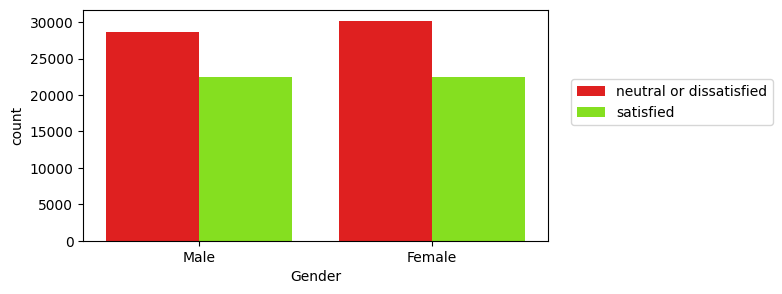

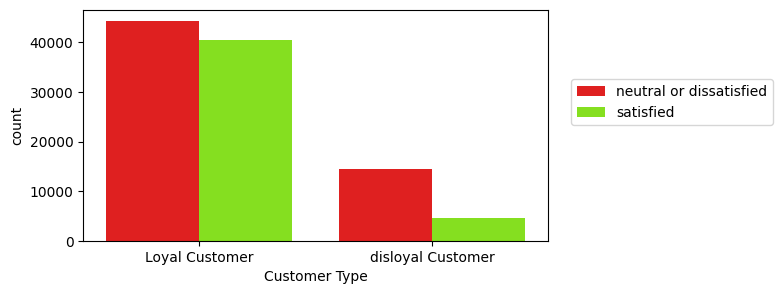

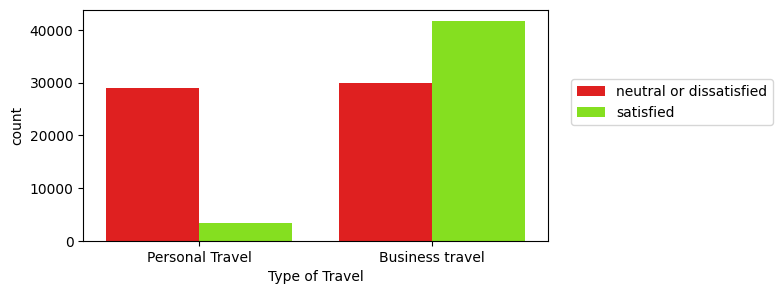

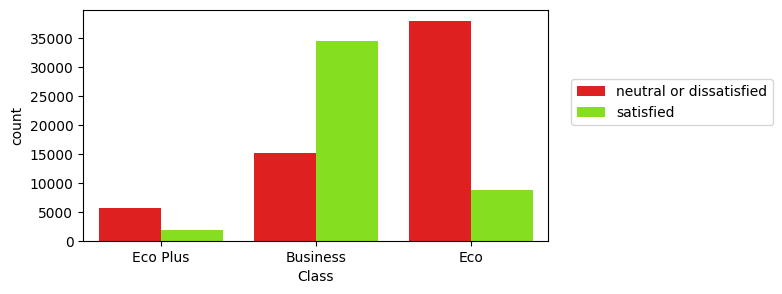

In [20]:
for col in cat_cols[:-1]:
    plt.figure(figsize=(6,3), dpi=100)
    sns.countplot(data=df,x=col,hue ='satisfaction',palette=['#FF0000','#87FF00'])
    plt.legend(loc=(1.05,0.5))

Let's get some valuable insights about the categorical columns using this helper function

In [21]:
def get_insights(data):
    for cols in cat_cols[:-1]:
        cat_group = data.groupby(cols)['satisfaction'].describe()
        percent = 100 *(cat_group['freq']/cat_group['count'])

        print("Insights from '{}' data".format(cols))

        for i in range(0,(len(cat_group))):
            print('{} from {} are {}'.format(round(percent[i],2),percent.index[i], cat_group['top'][i]))

get_insights(df)

Insights from 'Gender' data
57.26 from Female are neutral or dissatisfied
56.05 from Male are neutral or dissatisfied
Insights from 'Customer Type' data
52.27 from Loyal Customer are neutral or dissatisfied
76.33 from disloyal Customer are neutral or dissatisfied
Insights from 'Type of Travel' data
58.26 from Business travel are satisfied
89.83 from Personal Travel are neutral or dissatisfied
Insights from 'Class' data
69.43 from Business are satisfied
81.39 from Eco are neutral or dissatisfied
75.39 from Eco Plus are neutral or dissatisfied


#### Visualizing Numerical Features

In [22]:
numerical_cols = [col for col in df.columns if df[col].dtypes != 'O']
print('Number of numerical variables: ', len(numerical_cols))

Number of numerical variables:  18


In [23]:
print('Numerical Variables Column: ',numerical_cols)

Numerical Variables Column:  ['Age', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']


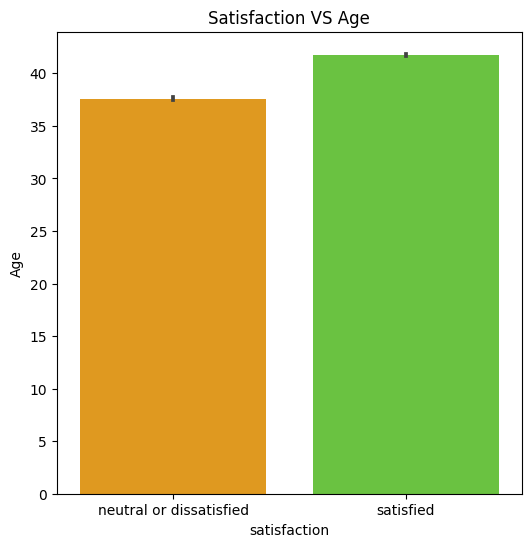

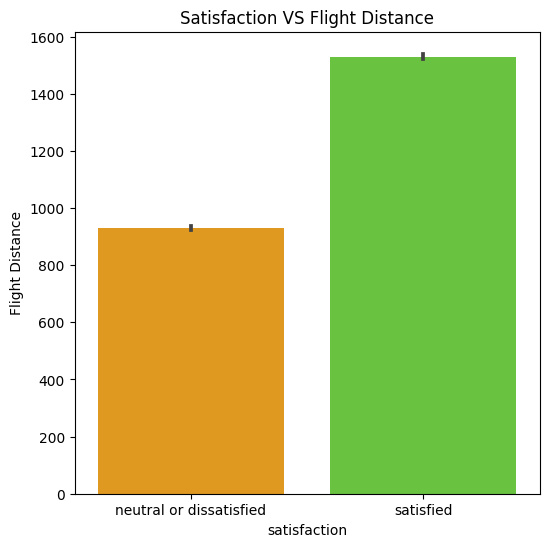

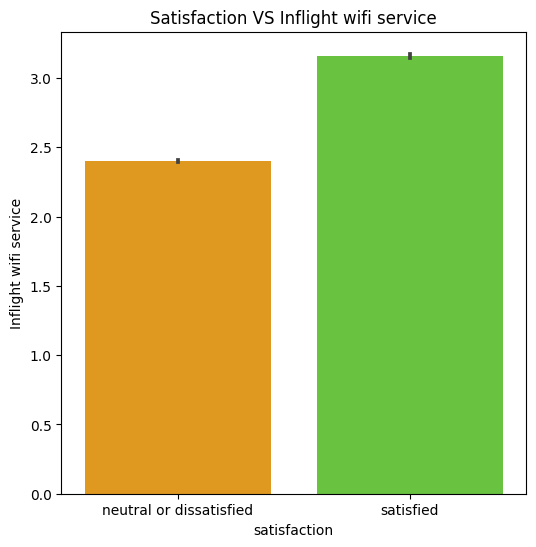

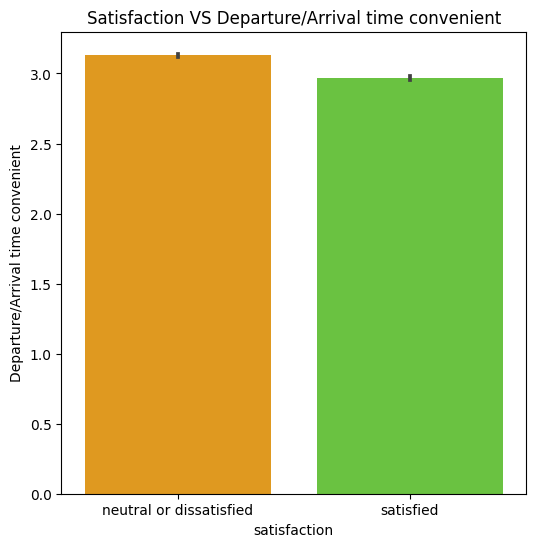

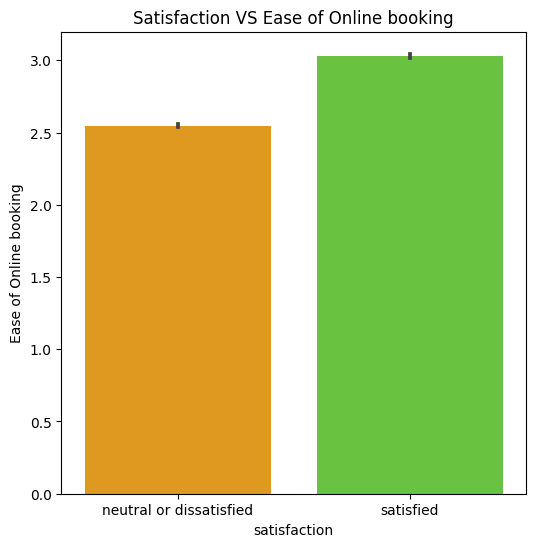

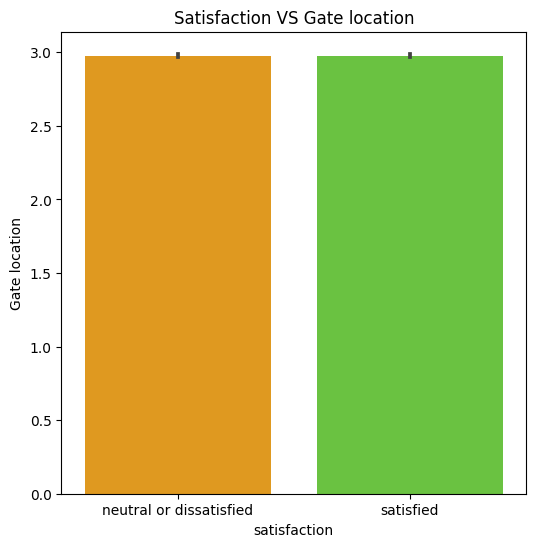

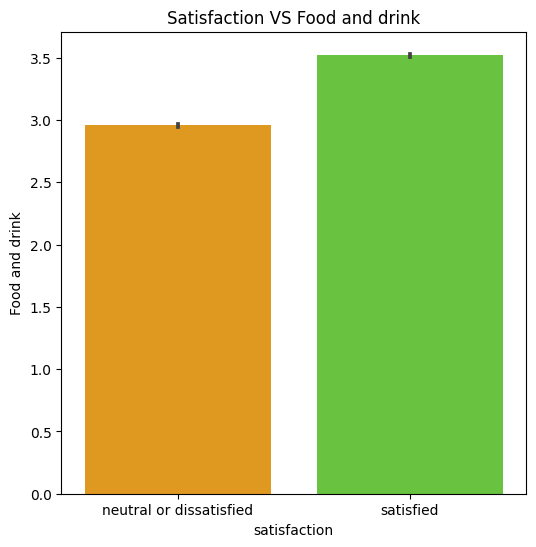

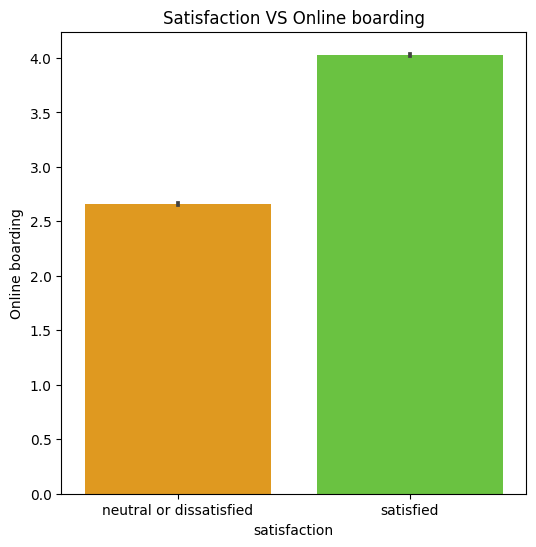

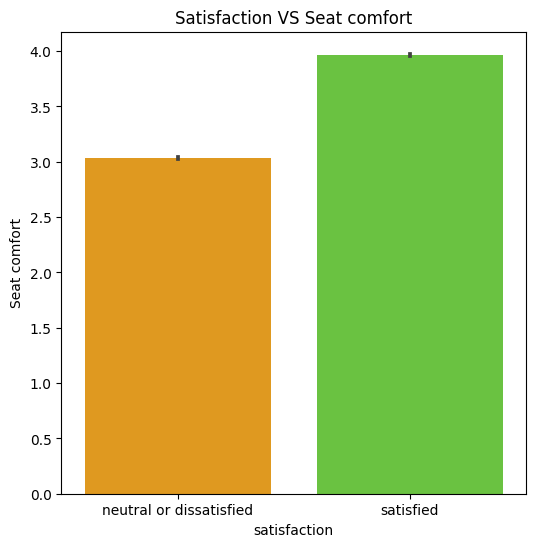

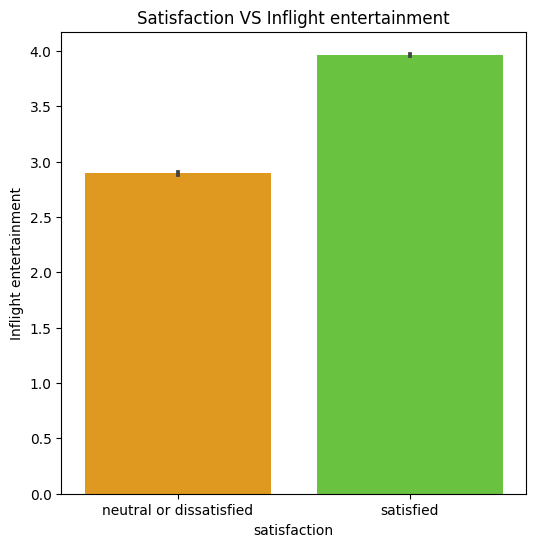

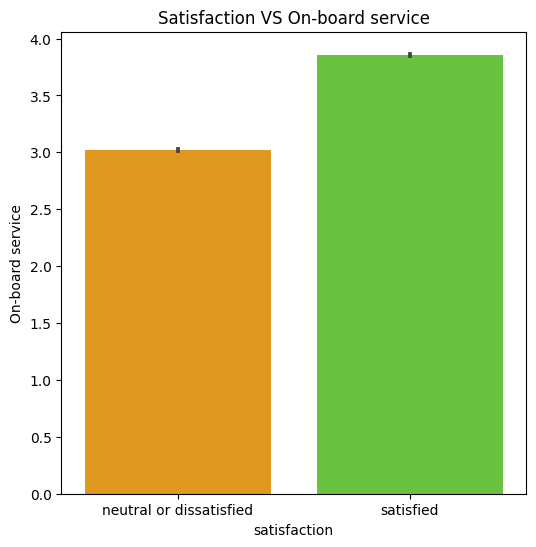

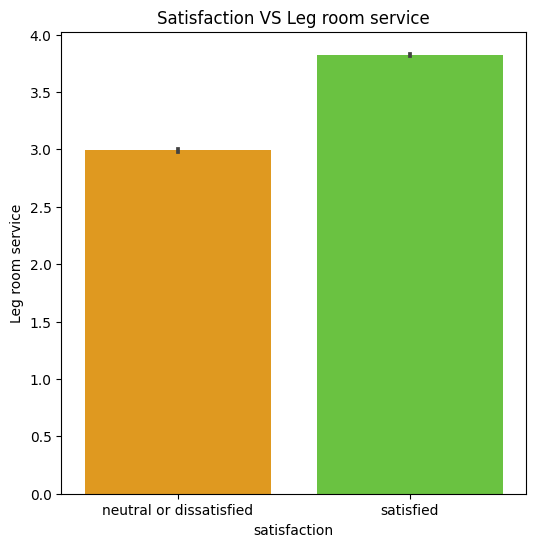

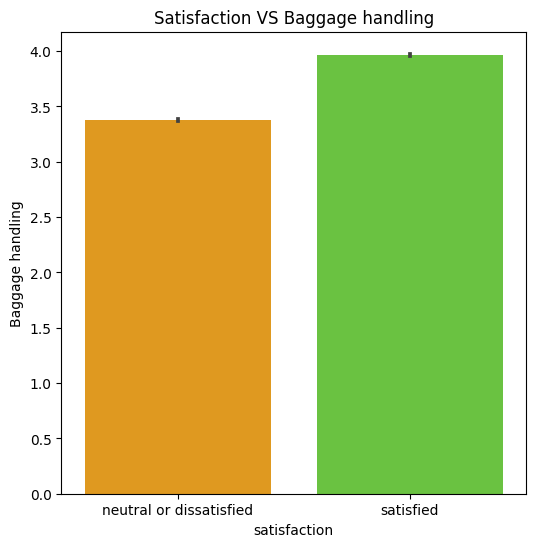

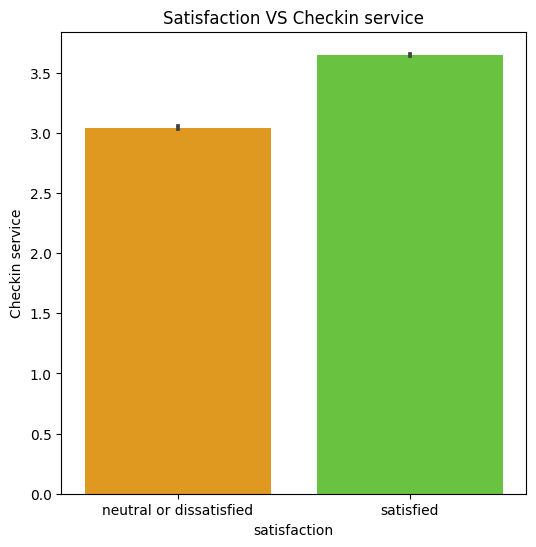

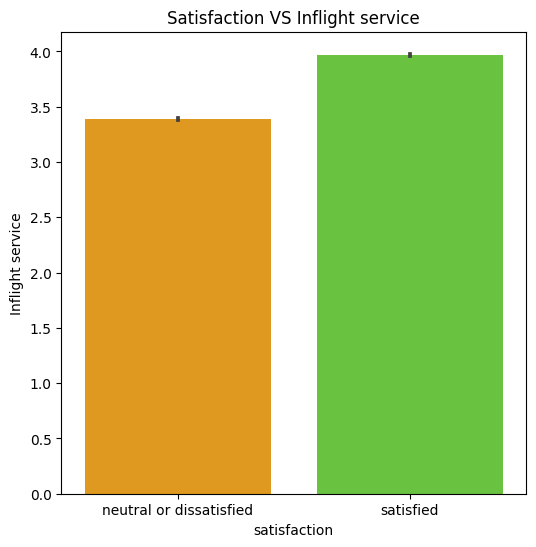

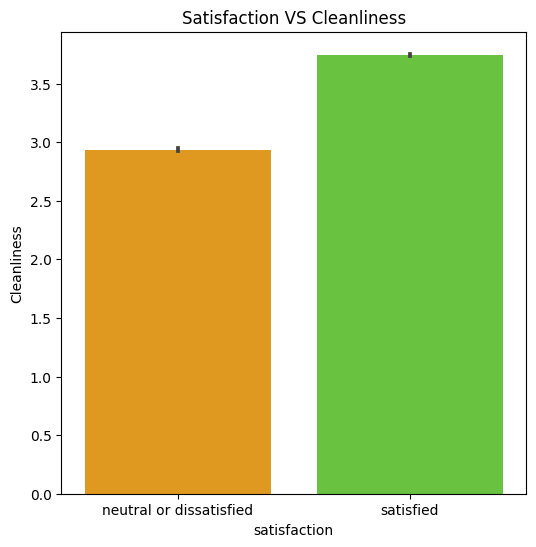

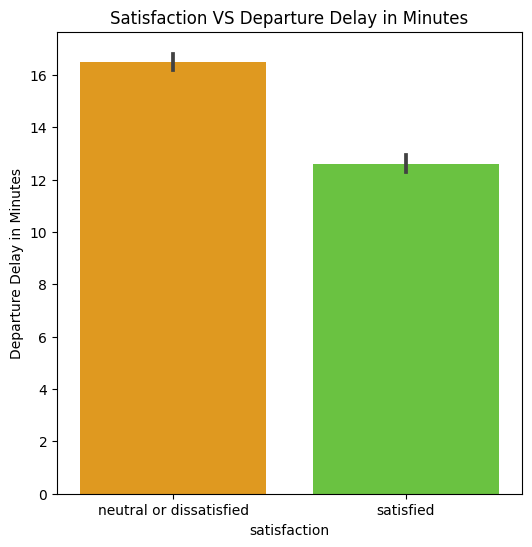

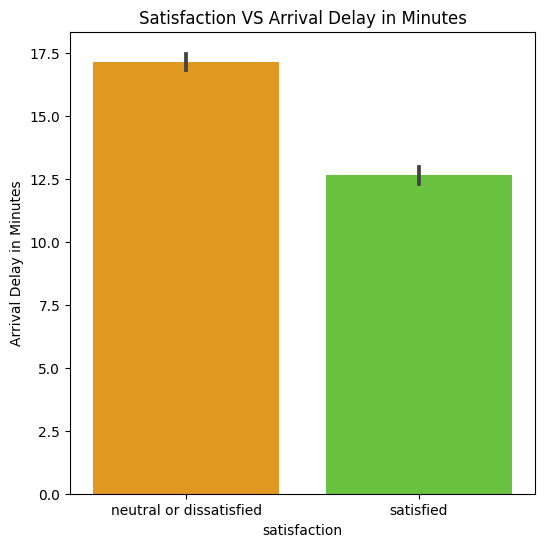

In [24]:
#Plotting the barplot of numerical features
for col in numerical_cols:
    plt.figure(figsize=(6,6), dpi=100)
    plt.title(f"Satisfaction VS {col}")
    sns.barplot(data=df,x='satisfaction',y=col,palette=['#FFA200','#62D82B'])

 From the plots, we can clearly conclude that age and Gate location, does not play a huge role in flight satisfaction, and also the gender does not tell us much as seen in the earlier plot. Hence we can consider to drop these values

In [25]:
#Dropping age, gender and gate location
df.drop(['Age','Gender','Gate location'], axis=1, inplace=True)
test_df.drop(['Age','Gender','Gate location'], axis=1, inplace=True)

 Let us now do an analysis of the delays, and it's relation with the satisfaction

In [26]:
df.groupby('satisfaction')['Arrival Delay in Minutes'].mean()

satisfaction
neutral or dissatisfied    17.127536
satisfied                  12.630799
Name: Arrival Delay in Minutes, dtype: float64

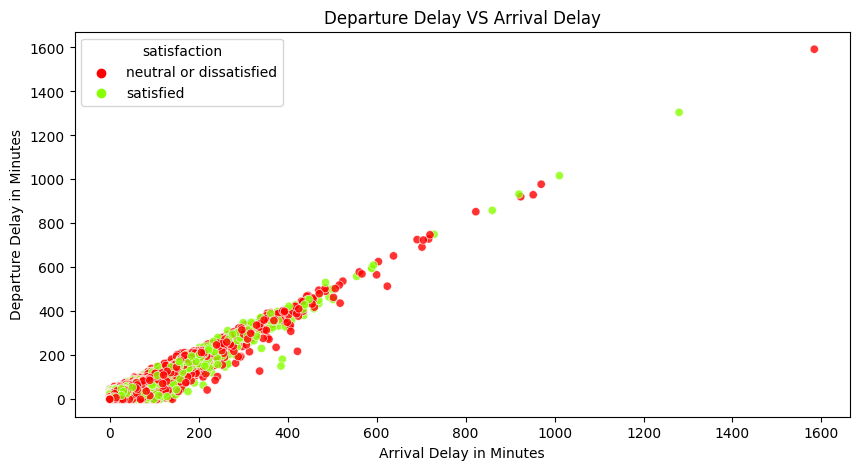

In [27]:
plt.figure(figsize=(10,5), dpi=100)
plt.title("Departure Delay VS Arrival Delay")
sns.scatterplot(data=df,x='Arrival Delay in Minutes',y='Departure Delay in Minutes',hue='satisfaction',palette=['#FF0000','#87FF00'], alpha=0.8)
sns.set_style('darkgrid')

The arrival and departure delay seems to have a linear relationship

(0.0, 1000.0)

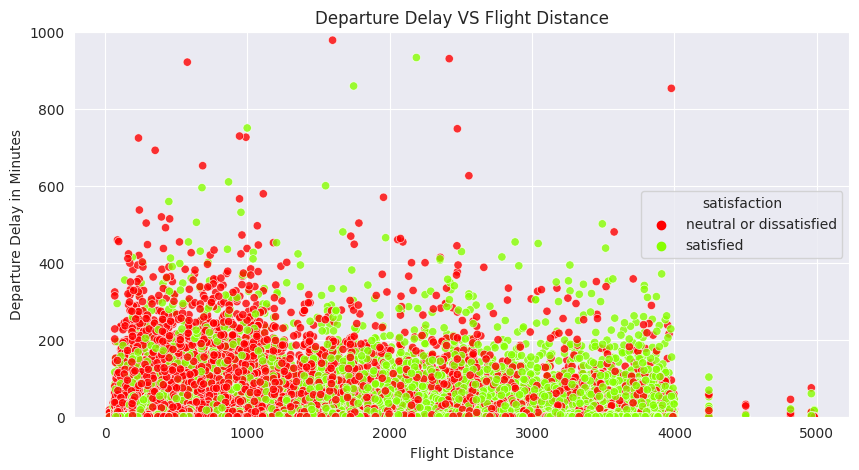

In [28]:
plt.figure(figsize=(10,5), dpi=100)
plt.title("Departure Delay VS Flight Distance")
sns.scatterplot(data=df,x='Flight Distance',y='Departure Delay in Minutes',hue='satisfaction',palette=['#FF0000','#87FF00'], alpha=0.8)
plt.ylim(0,1000)

Most passengers are okay with a slight delay in departure, so departure delay is less of a factor for a long distance flight, comparitively, however, short distance travellers does not seem to be excited about the departure delays

Let's analyze that whether Business or Economy class gets - which gets more sense of satisfaction

<Axes: title={'center': 'Business Class VS Economic Class'}, xlabel='Class', ylabel='count'>

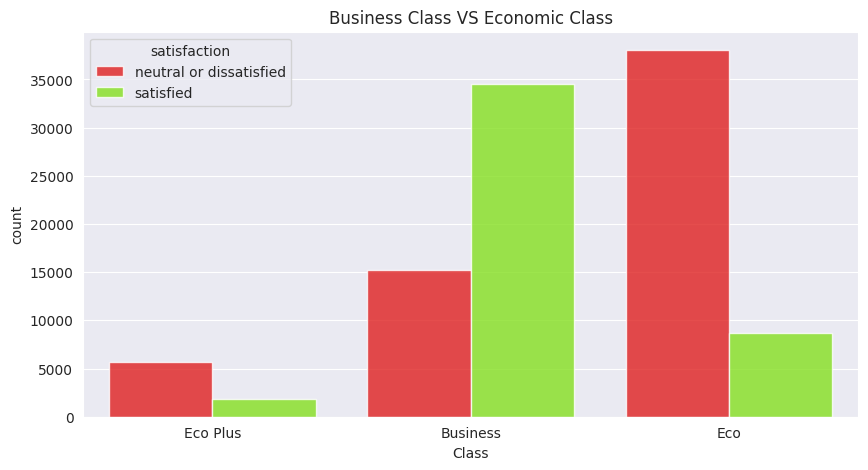

In [29]:
plt.figure(figsize=(10,5), dpi=100)
plt.title("Business Class VS Economic Class")
sns.countplot(data=df,x='Class',hue='satisfaction',palette=['#FF0000','#87FF00'], alpha=0.8)

As you can clearly see, the passengers in the business class are way more satisfied that the Eco and Eco Plus class passengers.

#### Correlation Matrix

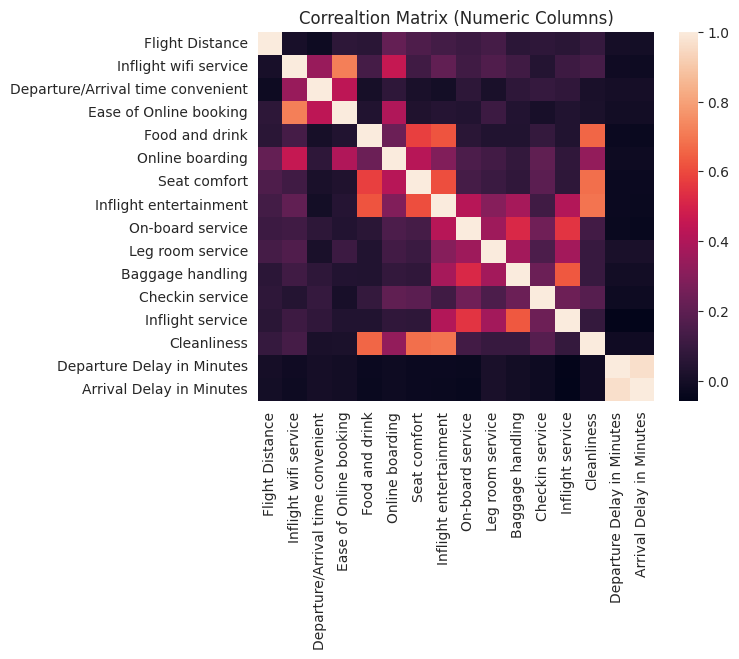

In [30]:
# Create the correlation matrix
numeric_columns = df.select_dtypes(include=[np.number])

# Create the correlation matrix
correlation_matrix = numeric_columns.corr()

# Create a heatmap of the correlation matrix
plt.title("Correaltion Matrix (Numeric Columns)")
sns.heatmap(correlation_matrix)

# Display the plot
plt.show()

There is a very high correlation between Departure Delay and Arrival Delay Features. And it's kind of obvious, the higher the departure delay, the higher is the arrival delay.

## Dealing with the Missing Values

Since there is a linear relationship between Arrival Delay and Departure Delay, we can replace the missing values of Arrival Delay with Departure Delay

In [31]:
df.isna().sum()

Customer Type                          0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [32]:
#Creating a copy of the dataset, before we delete the NA values and substitute
df_copy=df.copy()

In [33]:
df_na = df[df['Arrival Delay in Minutes'].isna()]
df_copy.dropna(inplace=True)
df_na['Arrival Delay in Minutes']=df_na['Departure Delay in Minutes']
df_copyna = pd.concat([df_copy,df_na])
df = df_copyna

<ipython-input-33-6c4d46c0ee8b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_na['Arrival Delay in Minutes']=df_na['Departure Delay in Minutes']


In [34]:
df.isna().sum()

Customer Type                        0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

Let us repeat the same steps for handling the missing values in Test file

In [35]:
test_df.isna().sum()

Customer Type                         0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0
dtype: int64

In [36]:
test_df_copy=test_df.copy()

In [37]:
test_df_na = test_df[test_df['Arrival Delay in Minutes'].isna()]
test_df_copy.dropna(inplace=True)
test_df_na['Arrival Delay in Minutes']=test_df_na['Departure Delay in Minutes']
test_df_copyna = pd.concat([test_df_copy,test_df_na])
test_df = test_df_copyna

<ipython-input-37-a4c46cb13174>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df_na['Arrival Delay in Minutes']=test_df_na['Departure Delay in Minutes']


In [38]:
test_df.isna().sum()

Customer Type                        0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

All the missing values are now handled rightly. Let us now move on towards splitting the data.

## Splitting the data into Training and Validation sets.

The train_test_split function from the sklearn.model_selection module allows you to split your dataset into separate training and testing subsets. It randomly shuffles the data and assigns a specified proportion or number of samples to each subset. This function is commonly used to divide the data into a training set and a test set, although it can also be used for other purposes such as creating validation sets.

Using this library function, we will be creating a validation set as the test set is already present with us.

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
train_df, val_df = train_test_split(df, test_size = 0.2, random_state=  42)

In [41]:
len(train_df), len(val_df)

(83123, 20781)

Now that we have divided the df into training and validation sets, let us also define our input and target columns

In [42]:
train_df.columns

Index(['Customer Type', 'Type of Travel', 'Class', 'Flight Distance',
       'Inflight wifi service', 'Departure/Arrival time convenient',
       'Ease of Online booking', 'Food and drink', 'Online boarding',
       'Seat comfort', 'Inflight entertainment', 'On-board service',
       'Leg room service', 'Baggage handling', 'Checkin service',
       'Inflight service', 'Cleanliness', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes', 'satisfaction'],
      dtype='object')

In [43]:
input_cols = ['Customer Type', 'Type of Travel', 'Class', 'Flight Distance',
       'Inflight wifi service', 'Departure/Arrival time convenient',
       'Ease of Online booking', 'Food and drink', 'Online boarding',
       'Seat comfort', 'Inflight entertainment', 'On-board service',
       'Leg room service', 'Baggage handling', 'Checkin service',
       'Inflight service', 'Cleanliness', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes']

target_col = 'satisfaction'

In [44]:
train_inputs = train_df[input_cols]
train_target = train_df[target_col]

In [45]:
train_inputs

,Customer Type,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
20974,Loyal Customer,Business travel,Eco,184,2,1,1,5,2,4,2,2,2,2,3,2,1,0,0.0
37007,Loyal Customer,Business travel,Business,3740,1,1,2,5,4,4,5,5,5,5,5,5,3,25,7.0
8488,disloyal Customer,Business travel,Eco,489,2,3,2,4,2,2,4,2,5,3,3,3,4,0,6.0
53655,Loyal Customer,Personal Travel,Eco Plus,283,4,4,4,4,5,4,5,5,4,4,4,5,4,37,31.0
78922,Loyal Customer,Business travel,Business,1174,1,2,2,1,4,4,1,1,1,1,1,1,2,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55054,Loyal Customer,Business travel,Business,251,2,1,1,1,4,4,2,2,2,2,3,2,2,0,0.0
77048,disloyal Customer,Business travel,Business,1072,2,2,2,2,2,2,2,5,2,4,3,4,2,29,25.0
35267,Loyal Customer,Business travel,Business,3267,1,1,1,5,5,4,5,5,5,5,5,5,4,0,0.0
861,Loyal Customer,Business travel,Business,1013,3,3,3,3,3,3,3,1,1,2,2,2,3,25,13.0


In [46]:
train_target

20974                  satisfied
37007                  satisfied
8488     neutral or dissatisfied
53655                  satisfied
78922    neutral or dissatisfied
                  ...           
55054    neutral or dissatisfied
77048    neutral or dissatisfied
35267                  satisfied
861                    satisfied
15832                  satisfied
Name: satisfaction, Length: 83123, dtype: object

Let us also segregate Validation Inputs, Validation Targets, Test Inputs and Test Targets

In [47]:
val_inputs = val_df[input_cols]
val_target = val_df[target_col]

In [48]:
test_inputs = test_df[input_cols]
test_target = test_df[target_col]

## Scaling using MinMaxScaler

In machine learning, it is often important to scale or normalize the features of your dataset to a specific range. The MinMaxScaler in scikit-learn is a preprocessing technique that allows you to transform your data by scaling it to a specified range, typically between 0 and 1.

In [49]:
from sklearn.preprocessing import MinMaxScaler

In [50]:
scaler = MinMaxScaler()

In [51]:
#defining the numerical columns
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
print (numeric_cols)
print(f"There are {len(numeric_cols)} numerical columns that need to be scaled")

['Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
There are 16 numerical columns that need to be scaled


In [52]:
scaler.fit(df[numeric_cols])

MinMaxScaler()

In [53]:
#scaling train, val, and test inputs to values ranging from 0 to 1.
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

<ipython-input-53-13ba3a88d9b4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
<ipython-input-53-13ba3a88d9b4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
<ipython-input-53-13ba3a88d9b4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

In [54]:
train_inputs.describe()

,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000
mean,0.234220,0.546114,0.613164,0.552242,0.639479,0.650078,0.687535,0.671032,0.675993,0.670856,0.657535,0.660453,0.727907,0.657099,0.009269,0.009595
std,0.201473,0.265541,0.304697,0.279809,0.265783,0.270032,0.263803,0.266320,0.257204,0.262701,0.295362,0.252818,0.235141,0.262259,0.023898,0.024405
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.077342,0.400000,0.400000,0.400000,0.400000,0.400000,0.400000,0.400000,0.400000,0.400000,0.500000,0.600000,0.600000,0.400000,0.000000,0.000000
50%,0.164378,0.600000,0.600000,0.600000,0.600000,0.600000,0.800000,0.800000,0.800000,0.800000,0.750000,0.600000,0.800000,0.600000,0.000000,0.000000
75%,0.345921,0.800000,0.800000,0.800000,0.800000,0.800000,1.000000,0.800000,0.800000,0.800000,1.000000,0.800000,1.000000,0.800000,0.007538,0.008207
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Handling the Categorical columns

Categorical data must be converted into numeric format for training machine learning models. One common approach is to employ one-hot encoding to represent categorical columns as binary vectors.

<img src="https://i.imgur.com/n8GuiOO.png" width="640">

One hot encoding involves adding a new binary (0/1) column for each unique category of a categorical column.

In [55]:
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()
categorical_cols

['Customer Type', 'Type of Travel', 'Class']

In [56]:
df[categorical_cols].nunique()

Customer Type     2
Type of Travel    2
Class             3
dtype: int64

In [57]:
from sklearn.preprocessing import OneHotEncoder

In [58]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

In [59]:
#fitting the encoder to the data i.e. identifying the full list of categories across all categorical columns
encoder.fit(df[categorical_cols])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


OneHotEncoder(handle_unknown='ignore', sparse=False, sparse_output=False)

Let us generate column names for each individual category using `get_feature_names_out`.

In [60]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
print(encoded_cols)

['Customer Type_Loyal Customer', 'Customer Type_disloyal Customer', 'Type of Travel_Business travel', 'Type of Travel_Personal Travel', 'Class_Business', 'Class_Eco', 'Class_Eco Plus']


The columns mentioned earlier will be included in the `train_inputs`, `val_inputs`, and `test_inputs` datasets. To carry out the encoding process, we utilize the transform method of the encoder.

In [61]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

In [62]:
train_inputs

,Customer Type,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Food and drink,Online boarding,Seat comfort,...,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
20974,Loyal Customer,Business travel,Eco,0.030897,0.4,0.2,0.2,1.0,0.4,0.8,...,0.2,0.000000,0.000000,1.0,0.0,1.0,0.0,0.0,1.0,0.0
37007,Loyal Customer,Business travel,Business,0.748990,0.2,0.2,0.4,1.0,0.8,0.8,...,0.6,0.015704,0.004419,1.0,0.0,1.0,0.0,1.0,0.0,0.0
8488,disloyal Customer,Business travel,Eco,0.092488,0.4,0.6,0.4,0.8,0.4,0.4,...,0.8,0.000000,0.003788,0.0,1.0,1.0,0.0,0.0,1.0,0.0
53655,Loyal Customer,Personal Travel,Eco Plus,0.050889,0.8,0.8,0.8,0.8,1.0,0.8,...,0.8,0.023241,0.019571,1.0,0.0,0.0,1.0,0.0,0.0,1.0
78922,Loyal Customer,Business travel,Business,0.230816,0.2,0.4,0.4,0.2,0.8,0.8,...,0.4,0.000000,0.000000,1.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55054,Loyal Customer,Business travel,Business,0.044426,0.4,0.2,0.2,0.2,0.8,0.8,...,0.4,0.000000,0.000000,1.0,0.0,1.0,0.0,1.0,0.0,0.0
77048,disloyal Customer,Business travel,Business,0.210218,0.4,0.4,0.4,0.4,0.4,0.4,...,0.4,0.018216,0.015783,0.0,1.0,1.0,0.0,1.0,0.0,0.0
35267,Loyal Customer,Business travel,Business,0.653473,0.2,0.2,0.2,1.0,1.0,0.8,...,0.8,0.000000,0.000000,1.0,0.0,1.0,0.0,1.0,0.0,0.0
861,Loyal Customer,Business travel,Business,0.198304,0.6,0.6,0.6,0.6,0.6,0.6,...,0.6,0.015704,0.008207,1.0,0.0,1.0,0.0,1.0,0.0,0.0


## Machine Learning

### Training a Logistic Regression Model
Logistic regression is a commonly used technique for solving binary classification problems. In a logistic regression model:

* we take linear combination (or weighted sum of the input features)
* we apply the sigmoid function to the result to obtain a number between 0 and 1
* this number represents the probability of the input being classified as "Yes"
* instead of RMSE, the cross entropy loss function is used to evaluate the results

<img src="https://i.imgur.com/g32CoIy.png" width="480">

In [63]:
from sklearn.linear_model import LogisticRegression

In [64]:
model = LogisticRegression(solver='liblinear')

In [65]:
model.fit(train_inputs[numeric_cols + encoded_cols], train_target)

LogisticRegression(solver='liblinear')

In [66]:
print(model.coef_.tolist())

[[-0.09398534567209832, 1.9742301085189673, -0.6105701717351859, -0.5911509670068785, -0.0877654467408896, 2.9751459008286676, 0.2940506533415782, 0.27168253407487797, 1.4554896062025826, 1.2931418435699453, 0.5508800000281332, 1.565235484454489, 0.6640936998777103, 1.1695466466841822, -1.9926701710747978, -4.936340827351305, -0.9177983545419218, -2.8658553411063306, -0.5476832128116398, -3.2359704828581677, -0.7354656342930502, -1.4802852981786787, -1.5679027631656197]]


In [67]:
weights_df = pd.DataFrame({
    'features': (numeric_cols + encoded_cols),
    'weights': model.coef_.tolist()[0]
})

In [68]:
weights_df

,features,weights
0,Flight Distance,-0.093985
1,Inflight wifi service,1.974230
2,Departure/Arrival time convenient,-0.610570
3,Ease of Online booking,-0.591151
4,Food and drink,-0.087765
5,Online boarding,2.975146
6,Seat comfort,0.294051
7,Inflight entertainment,0.271683
8,On-board service,1.455490
9,Leg room service,1.293142


<Axes: xlabel='weights', ylabel='features'>

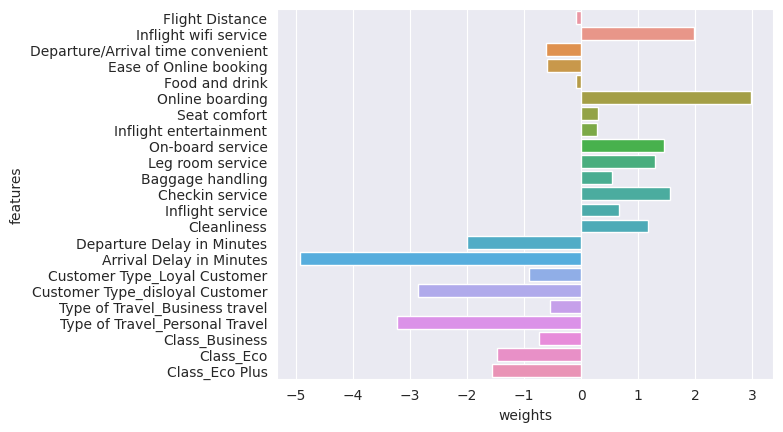

In [69]:
sns.barplot(data=weights_df, x='weights',y='features' )

### Making Predictions to our model

In [70]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

In [71]:
X_test.isna().sum()

Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
Customer Type_Loyal Customer         0
Customer Type_disloyal Customer      0
Type of Travel_Business travel       0
Type of Travel_Personal Travel       0
Class_Business                       0
Class_Eco                            0
Class_Eco Plus                       0
dtype: int64

In [72]:
train_preds = model.predict(X_train)

In [73]:
train_preds

array(['neutral or dissatisfied', 'satisfied', 'neutral or dissatisfied',
       ..., 'satisfied', 'neutral or dissatisfied', 'satisfied'],
      dtype=object)

In [74]:
train_target

20974                  satisfied
37007                  satisfied
8488     neutral or dissatisfied
53655                  satisfied
78922    neutral or dissatisfied
                  ...           
55054    neutral or dissatisfied
77048    neutral or dissatisfied
35267                  satisfied
861                    satisfied
15832                  satisfied
Name: satisfaction, Length: 83123, dtype: object

We can test the accuracy of the model's predictions by computing the percentage of matching values in train_preds and train_targets.

This can be done using the `accuracy_score` function from `sklearn.metrics`.

In [75]:
from sklearn.metrics import accuracy_score

In [76]:
accuracy_score(train_target, train_preds)

0.8760752138397315

In [77]:
from sklearn.metrics import confusion_matrix

In [78]:
confusion_matrix(train_target, train_preds, normalize='true')

array([[0.9048215 , 0.0951785 ],
       [0.16158977, 0.83841023]])

In [79]:

def predict_and_plot(inputs, target, name=''):
    preds = model.predict(inputs)

    accuracy = accuracy_score(target, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))

    cf = confusion_matrix(target, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));

    return preds


Accuracy: 87.61%


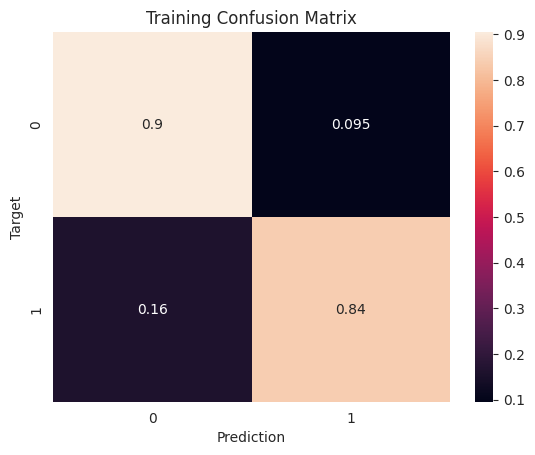

In [80]:
train_preds = predict_and_plot(X_train, train_target, 'Training')

Let us do the predictions for Validation and Test Set also using this helper function

Accuracy: 87.26%


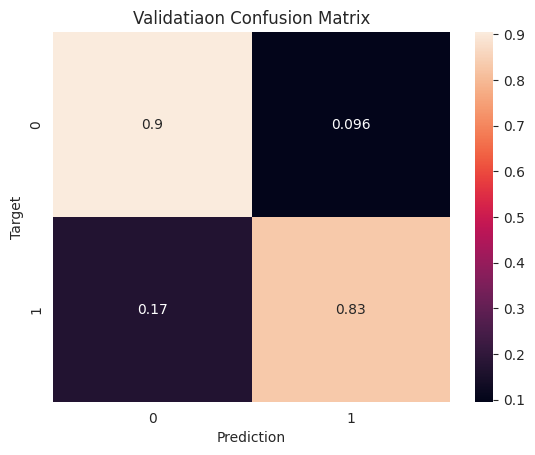

In [81]:
val_preds = predict_and_plot(X_val, val_target, 'Validatiaon')

Accuracy: 87.07%


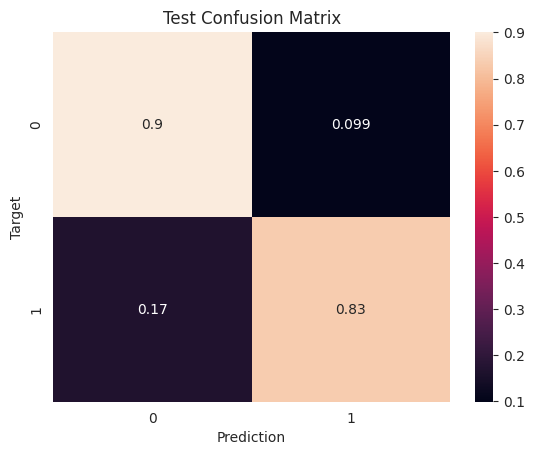

In [82]:
test_preds = predict_and_plot(X_test, test_target, 'Test')

So, from all these models, we are getting an acccuracy of 87%, which is not bad. We can improve this model further using Random Forests. But, is this model any better than a foolish baseline model? Let's find out.

## Foolish Model

Let's create some foolish models: one that guesses randomly and another that always return "satisfied" or "neutral or dissatisfied". All of these models completely ignore the inputs given to them.

In [83]:
def random_guess(inputs):
    return np.random.choice(["satisfied", "neutral or dissatisfied"], len(inputs))

In [84]:
def all_satisfied(inputs):
    return np.full(len(inputs), "satisfied")

In [85]:
def all_dissatisfied(inputs):
    return np.full(len(inputs), "neutral or dissatisfied")

In [86]:
accuracy_score(test_target, random_guess(X_test))

0.5031952571604558

In [87]:
accuracy_score(test_target, all_satisfied(X_test))

0.4389821373575608

In [88]:
accuracy_score(test_target, all_dissatisfied(X_test))

0.5610178626424391

So, from this, it can be concluded that the Logistic Regression model that we have trained is way far better than these foolish models.

### Training the Model using Decision Trees

## Training and Visualizing Decision Trees

In everyday language, a decision tree typically represents a hierarchical sequence of binary choices.

<img src="https://i.imgur.com/qSH4lqz.png" width="480">

In machine learning, a decision tree operates in a similar manner, with the distinction that the optimal structure and hierarchy of decisions are determined by the computer rather than being manually defined by us.

In [89]:
from sklearn.tree import DecisionTreeClassifier

In [90]:
model = DecisionTreeClassifier(random_state=42)

In [91]:
%%time
model.fit(X_train, train_target)

CPU times: user 553 ms, sys: 94 µs, total: 553 ms
Wall time: 552 ms


DecisionTreeClassifier(random_state=42)

#### Evaluation

In [92]:
train_rf_preds = model.predict(X_train)

In [93]:
train_rf_preds

array(['satisfied', 'satisfied', 'neutral or dissatisfied', ...,
       'satisfied', 'satisfied', 'satisfied'], dtype=object)

In [94]:
accuracy_score(train_target, train_rf_preds)

0.9999879696353596

The training accuracy using the Decision Trees method has gone almost 100%. But, this is not surprising because the Decision Tree model has achieved it by completely memorizing the training data. So, let us now test this model on Validation data.  We can make predictions and compute accuracy in one step using model.score

In [95]:
model.score(X_val, val_target)

0.9445166257639189

In [96]:
val_target.value_counts() / len(val_target)

neutral or dissatisfied    0.564747
satisfied                  0.435253
Name: satisfaction, dtype: float64

#### Visualization of the decision tree learned from the training data

In [97]:
from sklearn.tree import plot_tree, export_text

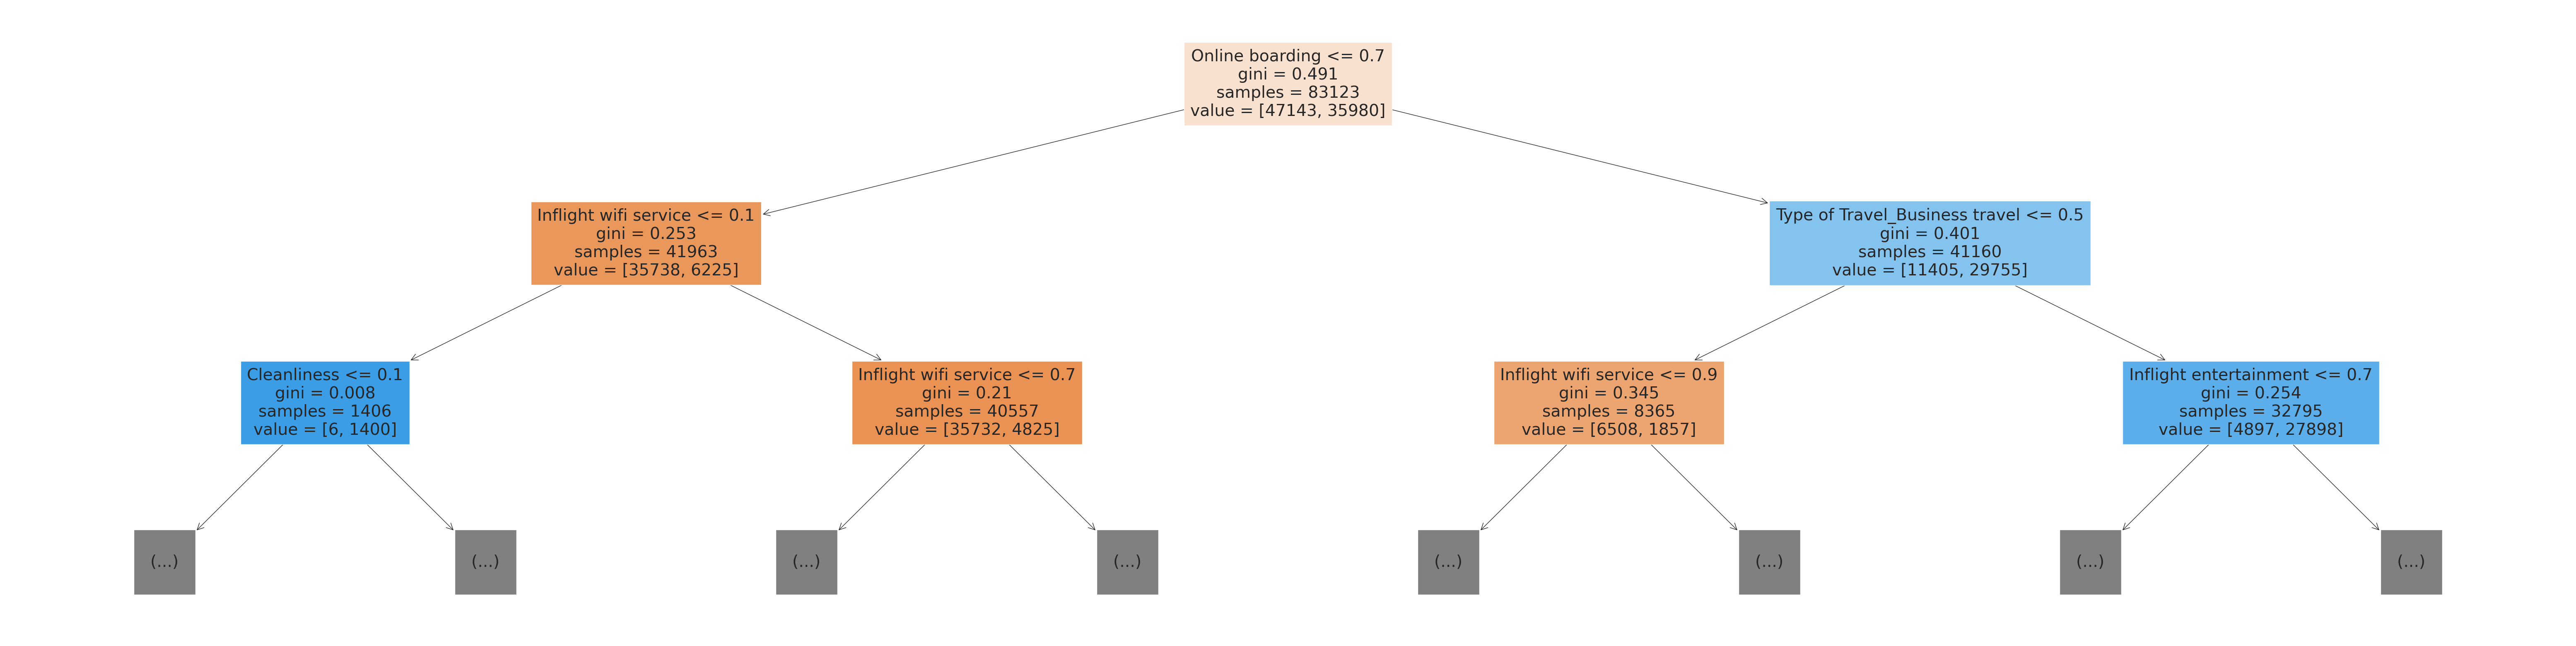

In [98]:
plt.figure(figsize=(80,20))
plot_tree(model, feature_names=X_train.columns, max_depth=2, filled=True);

#### Feature Importance

In [99]:
model.feature_importances_

array([0.03217122, 0.17793502, 0.01487399, 0.00904605, 0.00564   ,
       0.36395718, 0.01733138, 0.04932668, 0.00981437, 0.01404028,
       0.01982934, 0.0333649 , 0.01848721, 0.01088626, 0.00883978,
       0.01112181, 0.02311189, 0.01422313, 0.13334383, 0.01194848,
       0.01887411, 0.0010779 , 0.00075518])

In [100]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [101]:
importance_df

,feature,importance
5,Online boarding,0.363957
1,Inflight wifi service,0.177935
18,Type of Travel_Business travel,0.133344
7,Inflight entertainment,0.049327
11,Checkin service,0.033365
0,Flight Distance,0.032171
16,Customer Type_Loyal Customer,0.023112
10,Baggage handling,0.019829
20,Class_Business,0.018874
12,Inflight service,0.018487


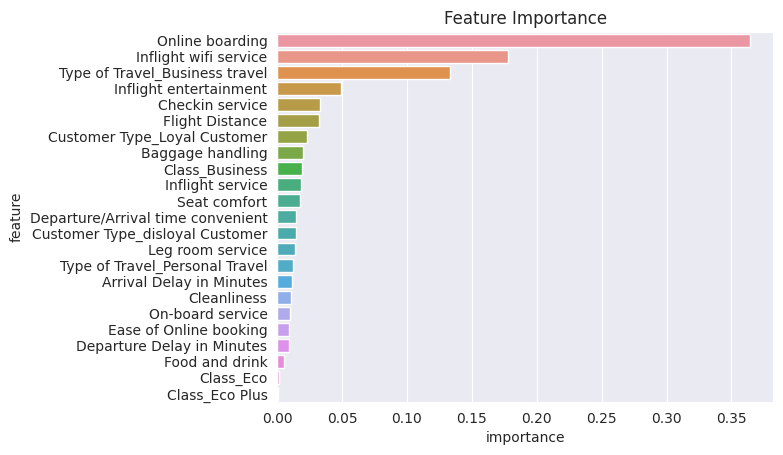

In [102]:
plt.title('Feature Importance')
sns.barplot(data=importance_df, x='importance', y='feature');

#### Hyperparameter Tuning

In [103]:
model = DecisionTreeClassifier(max_depth=3, random_state=42)

In [104]:
model.fit(X_train, train_target)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [105]:
model.score(X_train, train_target)

0.8845686512758202

In [106]:
model.score(X_val, val_target)

0.8848467349983158

Let's experiment with different depths using this function

In [107]:
def max_depth_error(md):
    model = DecisionTreeClassifier(max_depth=md, random_state=42)
    model.fit(X_train, train_target)
    train_err = 1 - model.score(X_train, train_target)
    val_err = 1 - model.score(X_val, val_target)
    return {'Max Depth': md, 'Training Error': train_err, 'Validation Error': val_err}

In [108]:
errors_df = pd.DataFrame([max_depth_error(md) for md in range(1, 21)])

In [109]:
errors_df

,Max Depth,Training Error,Validation Error
0,1,0.212095,0.212887
1,2,0.139372,0.140465
2,3,0.115431,0.115153
3,4,0.110740,0.113565
4,5,0.095930,0.095231
5,6,0.079906,0.082046
6,7,0.069042,0.072711
7,8,0.061812,0.066503
8,9,0.056916,0.062076
9,10,0.050131,0.056301


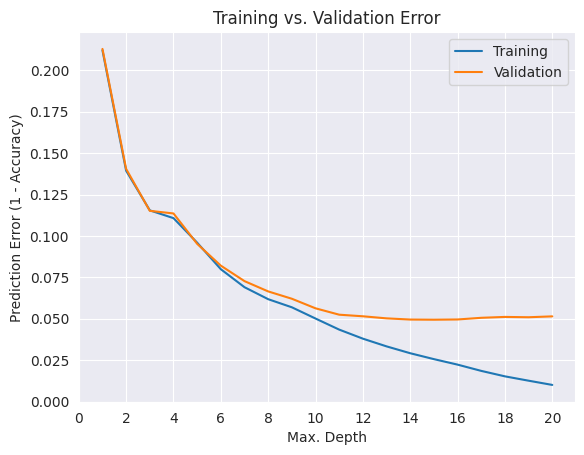

In [110]:
plt.figure()
plt.plot(errors_df['Max Depth'], errors_df['Training Error'])
plt.plot(errors_df['Max Depth'], errors_df['Validation Error'])
plt.title('Training vs. Validation Error')
plt.xticks(range(0,21, 2))
plt.xlabel('Max. Depth')
plt.ylabel('Prediction Error (1 - Accuracy)')
plt.legend(['Training', 'Validation'])

In [111]:
model = DecisionTreeClassifier(max_depth=13, random_state=42).fit(X_train, train_target)
model.score(X_val, val_target)

0.9497618016457341

In [112]:
def max_leaf_nodes_error(mln):
    model = DecisionTreeClassifier(max_leaf_nodes=mln, random_state=42)
    model.fit(X_train, train_target)
    train_err = 1 - model.score(X_train, train_target)
    val_err = 1 - model.score(X_val, val_target)
    return {'Max Leaf Nodes': mln, 'Training Error': train_err, 'Validation Error': val_err}

In [113]:
errors_df2 = pd.DataFrame([max_leaf_nodes_error(mln) for mln in range(2, 128)])

In [114]:
errors_df2

,Max Leaf Nodes,Training Error,Validation Error
0,2,0.212095,0.212887
1,3,0.156142,0.157692
2,4,0.139372,0.140465
3,5,0.126211,0.126269
4,6,0.115504,0.115250
...,...,...,...
121,123,0.047015,0.050238
122,124,0.046858,0.049949
123,125,0.046786,0.049949
124,126,0.046666,0.049516


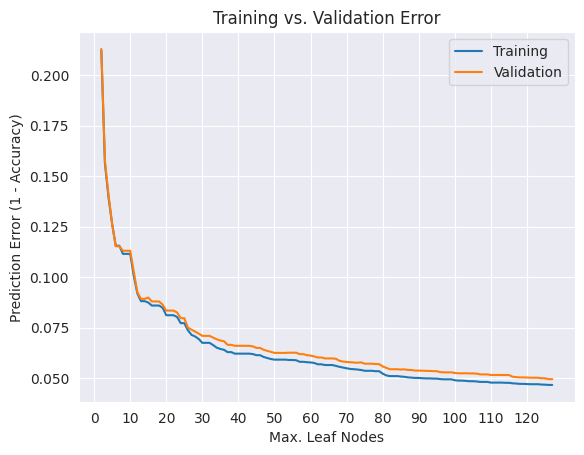

In [115]:
plt.figure()
plt.plot(errors_df2['Max Leaf Nodes'], errors_df2['Training Error'])
plt.plot(errors_df2['Max Leaf Nodes'], errors_df2['Validation Error'])
plt.title('Training vs. Validation Error')
plt.xticks(range(0,128, 10))
plt.xlabel('Max. Leaf Nodes')
plt.ylabel('Prediction Error (1 - Accuracy)')
plt.legend(['Training', 'Validation'])

Looks like the max_leaf_nodes are not helping us make our model better, so we will proceed with `max_depth` as a hyperparameter.

Along with `max_depth`, this time let us set the splitter as 'random' and see if it does any better to our model.

In [116]:
model= DecisionTreeClassifier(splitter='random',max_depth=13, random_state=42).fit(X_train, train_target)
model.score(X_val, val_target)

0.9501467686829316

Okay, adding `splitter='random'` have increased the accuracy of our model on test set by 1%. So, let's keep it.

Let us evaluate the score of this tuned model on the test set.

In [117]:
model.score(X_test, test_target)

0.9513396981829381

## Gradient Boosting Model with XGBoost

Since XGBoost can only interpret the data in numerical format, we will have to change the format of out target columns. So, let's map `neutral or dissatisfied` as 0 and `satisfied` as 1 using `map` function.

In [118]:
train_target

20974                  satisfied
37007                  satisfied
8488     neutral or dissatisfied
53655                  satisfied
78922    neutral or dissatisfied
                  ...           
55054    neutral or dissatisfied
77048    neutral or dissatisfied
35267                  satisfied
861                    satisfied
15832                  satisfied
Name: satisfaction, Length: 83123, dtype: object

In [119]:
train_target = train_target.map({'neutral or dissatisfied':0,'satisfied':1 })
val_target = val_target.map({'neutral or dissatisfied':0,'satisfied':1 })
test_target = test_target.map({'neutral or dissatisfied':0,'satisfied':1 })

In [120]:
train_target

20974    1
37007    1
8488     0
53655    1
78922    0
        ..
55054    0
77048    0
35267    1
861      1
15832    1
Name: satisfaction, Length: 83123, dtype: int64

In [121]:
from xgboost import XGBClassifier, plot_importance

In [122]:
model_xgb = XGBClassifier(random_state=42, n_jobs=-1)

In [123]:
model_xgb.fit(X_train, train_target)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [124]:
preds_xgb = model_xgb.predict(X_train)

In [125]:
preds_xgb

array([0, 1, 0, ..., 1, 0, 1])

In [126]:
accuracy_score(train_target, preds_xgb)

0.9736895925315496

In [127]:
def test_params(**params):
    model = XGBClassifier(random_state=42, n_jobs=-1, **params).fit(X_train, train_target)
    train_err = 1 - model.score(X_train, train_target)
    val_err = 1 - model.score(X_val, val_target)
    return train_err, val_err

In [129]:
test_params(n_estimators=20, max_depth=4)

(0.058780361632761124, 0.06015109956209996)

Let's define a helper function to test and plot different values of a single parameter.

In [131]:
def test_param_and_plot(param_name, param_values):
    train_errors, val_errors = [], []
    for value in param_values:
        params = {param_name: value}
        train_err, val_err = test_params(**params)
        train_errors.append(train_err)
        val_errors.append(val_err)
    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_errors, 'b-o')
    plt.plot(param_values, val_errors, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('Error')
    plt.legend(['Training', 'Validation'])

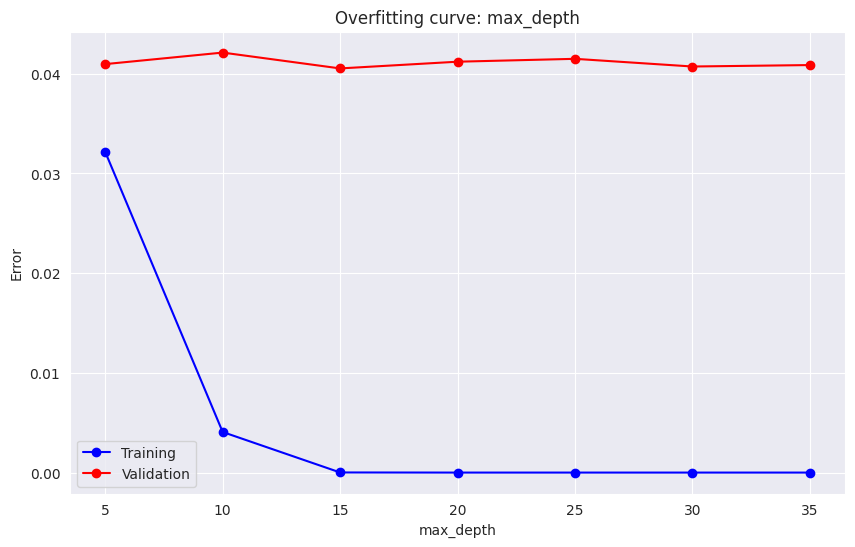

In [132]:
test_param_and_plot('max_depth', [5, 10, 15, 20, 25, 30, 35])

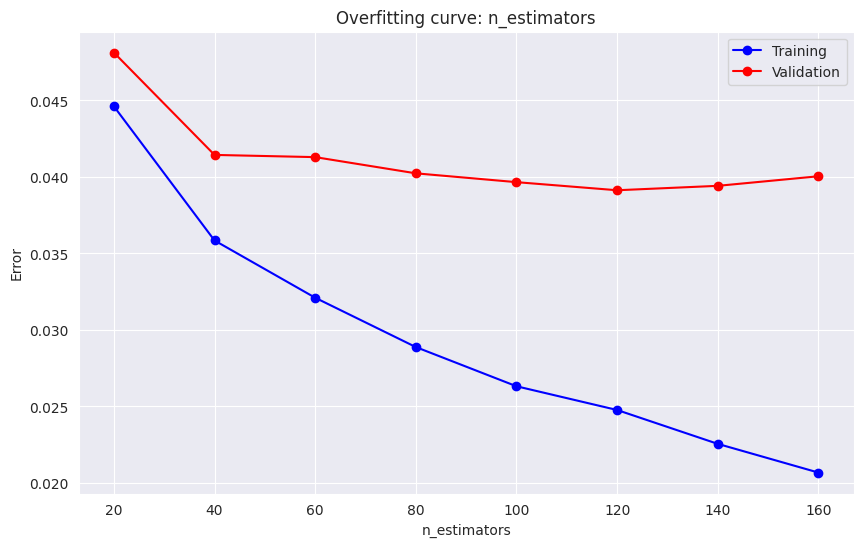

In [133]:
test_param_and_plot('n_estimators', [20, 40, 60, 80, 100, 120, 140, 160])

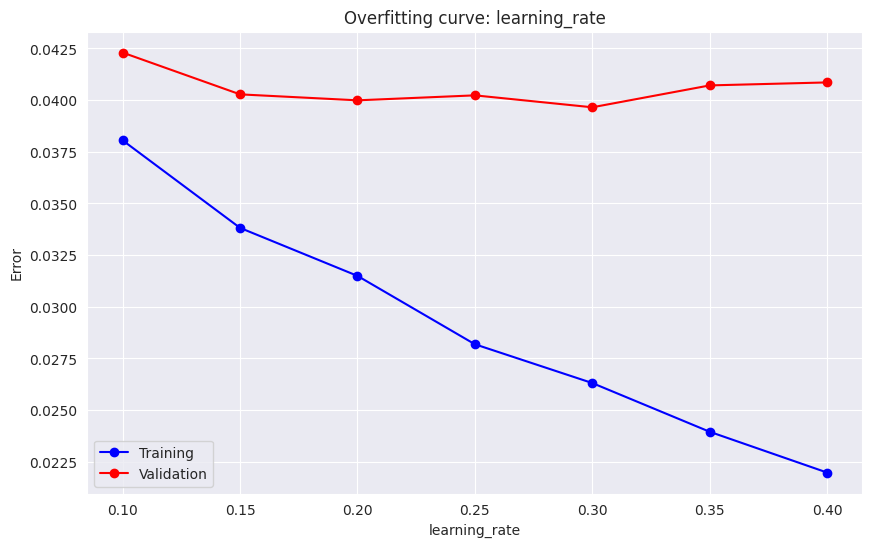

In [134]:
test_param_and_plot('learning_rate', [0.1, 0.15, 0.2,0.25, 0.3,0.35, 0.4 ])

Looks like `n_estimators` of 120, `learning_rate` of 0.2 and `max_depth` of 15 is optimum for best results.

In [144]:
model_xgb = XGBClassifier(random_state=42, n_jobs=-1,n_estimators = 120, learning_rate = 0.2 , max_depth = 15)

In [145]:
model_xgb.fit(X_train, train_target)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=15, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=120, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [137]:
model_xgb.score(X_train, train_target)

0.9998195445303947

In [138]:
model_xgb.score(X_val, val_target)

0.9594340984553198

In [139]:
model_xgb.score(X_test, test_target)

0.960232522328303

Woah, by implementing the XGBoost Model, we have touched the accuracy of 96% on the test set. So, here is our best and final model after trying out different models.

## Final Model

In [140]:
model_xgb = XGBClassifier(random_state=42, n_jobs=-1,n_estimators = 120, learning_rate = 0.2 , max_depth = 15)

In [141]:
from xgboost import plot_tree

Now, let us plot the feature importances, and visualize it

## Feature Importance

In [146]:
feature_importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model_xgb.feature_importances_
})

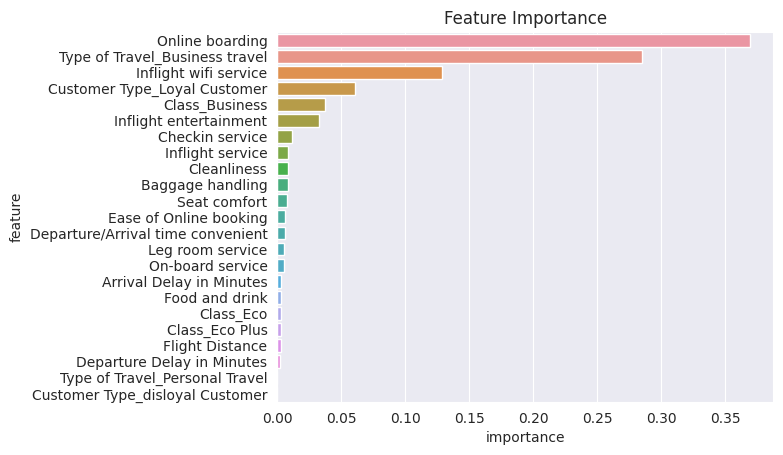

In [147]:
plt.title('Feature Importance')
sns.barplot(data=feature_importance_df.sort_values('importance', ascending=False), x='importance', y='feature');

## Summary

* In this notebook we explored Supervised Machine Learning methods. Regression models such as linear regression and decision tree are used to predict whether the passenger is satisfied, or neutral and not satisfied.
* We used Pandas, Numpy, Matplotlib, Seaborn and Plotly to perform the exploratory data analysis and gather insights for machine learning.
* Our dataset had 103904 rows and 25 columns
* We prepared the data by dropping the unnecessary columns , split the dataset to make the train and validation sets (80:20), handled missing values, encoded categorical values using OneHotEncoder and also scaled the values using MinMaxScaler.
* Our Logistic classification model performed comparitively poor than the Decision Tree model, but it was way better than the Foolish models that predicted some random or a single constant value.
* The Decision Trees Classification model was further tuned with Hyperparameters like `max_depth` and `splitter` to reduce the overfitting of the model and achieve the accuracy of 95%.
* The final Gradient Boosting Model made with XGBoost showed us the best accuracy score withn 96% accuracy.

## Future Work

* Add different kinds of Hyperparameters to Random Forest and XGBM to reduce overfitting and increase accuracy.
* Combine this dataset with some other dataset and use its insights and features to train another model.

## References

1. Build a Machine Learning Project From Scratch with Python and Scikit-learn ([link](https://www.youtube.com/live/Qr9iONLD3Lk?feature=share))
2. [Airline Passenger Satisfaction Dataset on Kaggle](https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction)





# Thankyou